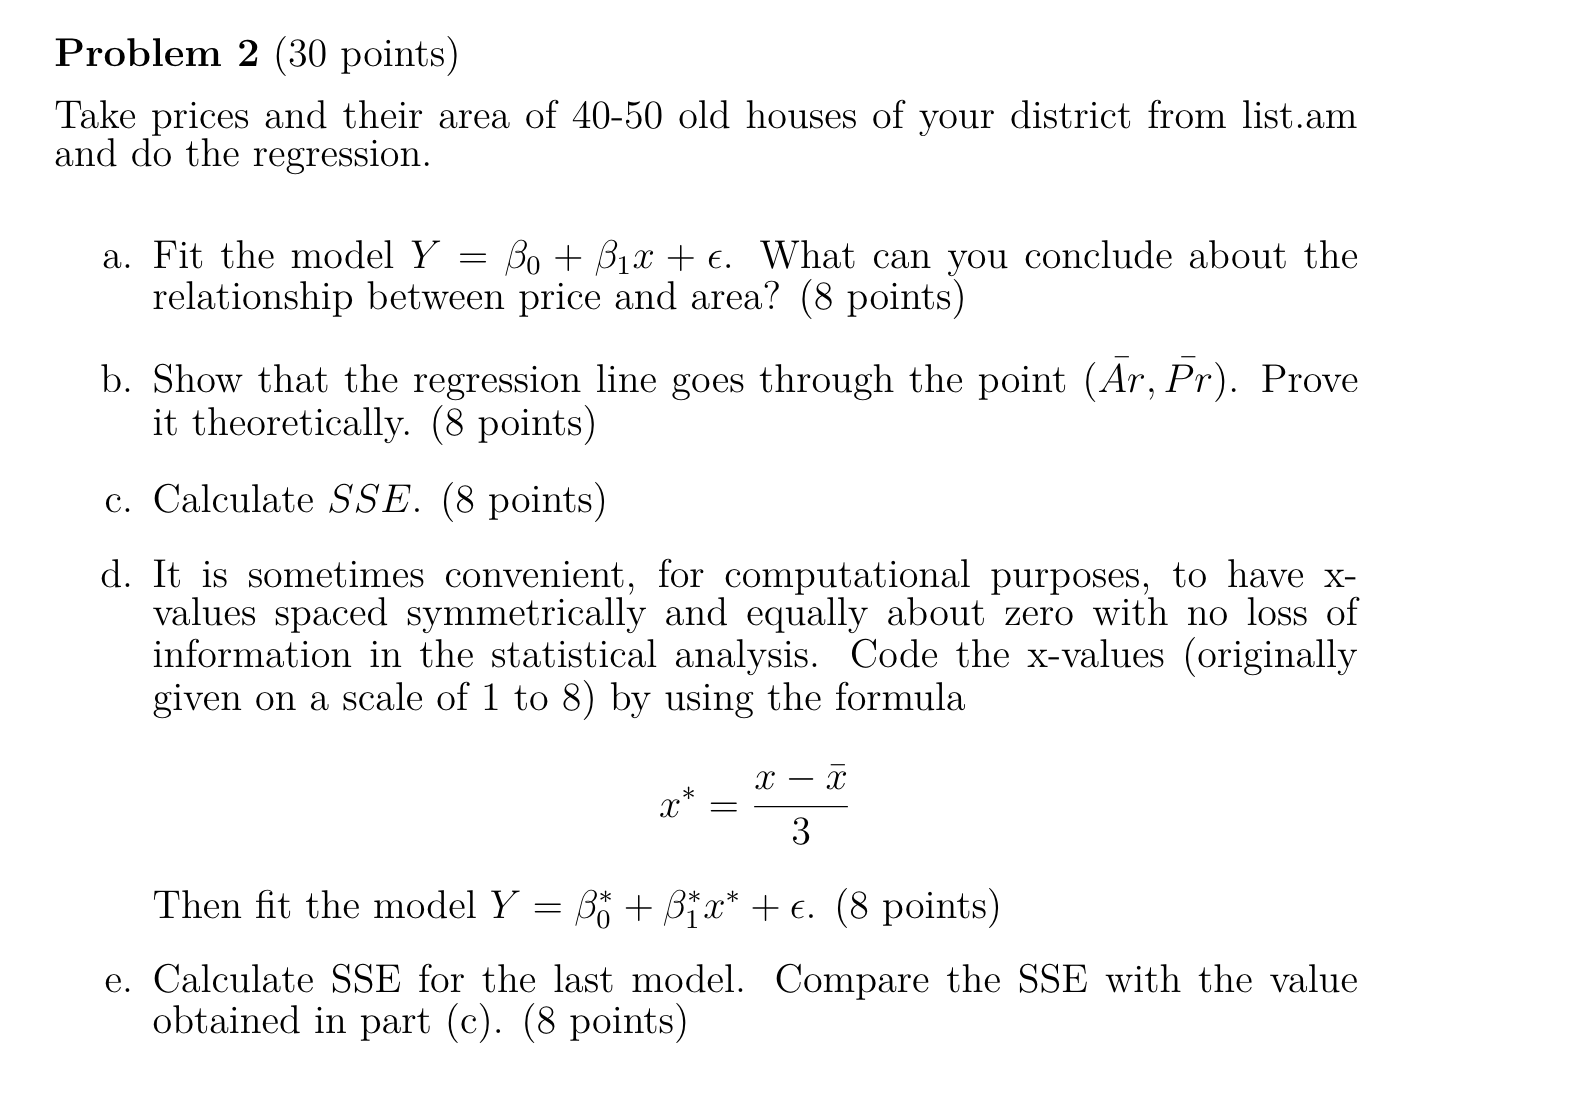

In [28]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('Area_Price.csv', delimiter=';')
data

,Area,Price
0,450,390000
1,210,148000
2,400,850000
3,400,480000
4,120,235000
5,340,150000
6,95,86000
7,270,390000
8,86,110000
9,220,245000


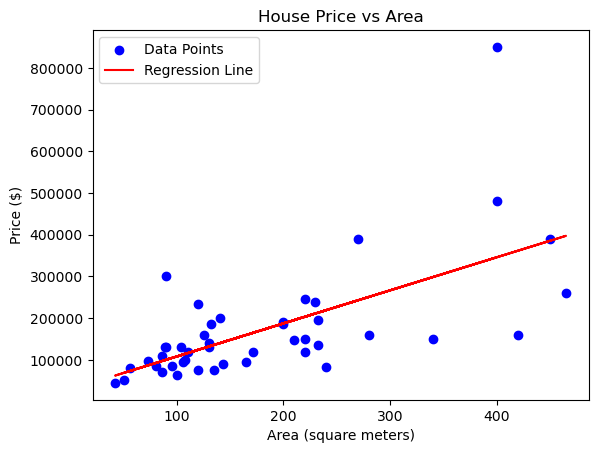

In [29]:
X = data['Area'].values.reshape(-1, 1) 
Y = data['Price'].values

model = LinearRegression()

model.fit(X, Y)

Y_pred = model.predict(X)

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('House Price vs Area')
plt.xlabel('Area (square meters)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [30]:
#part a
beta_0 = model.intercept_
beta_1 = model.coef_[0]

print(f"Intercept (beta_0): {beta_0}")
print(f"Slope (beta_1): {beta_1}")

Intercept (beta_0): 29301.096081039606
Slope (beta_1): 791.7274122582625


1)The intercept value of approximately 29301.1 suggests that if the area of a house were 0 square meters (which isn't practical but provides a baseline), the predicted price would be around $29,301.

2)The slope value of approximately 791.73 indicates that for each one-unit increase in the area (in square meters), the price of the house is predicted to increase by about $791.73. This is a crucial piece of information as it quantifies the rate at which house prices increase with an increase in area. The positive value of the slope confirms a direct proportional relationship,positive correlation between house area and price, meaning larger houses are generally more expensive.


In [31]:
#Part b

mean_area = data['Area'].mean()
mean_price = data['Price'].mean()

print(f"Mean Area (Ār): {mean_area}")
print(f"Mean Price (P̄r): {mean_price}")

predicted_mean_price = beta_0 + beta_1 * mean_area
print(f"Predicted Mean Price based on the Mean Area: {predicted_mean_price}")


Mean Area (Ār): 180.11111111111111
Mean Price (P̄r): 171900.0
Predicted Mean Price based on the Mean Area: 171900.0


As the predicted mean price from the linear regression model is equal to the actual mean price calculated from the data, this implies that the regression line  passes through the mean point (Ar¯ ,Pr¯ ),where Ar¯ is the mean of the area values and Pr¯ is the mean of the price values.

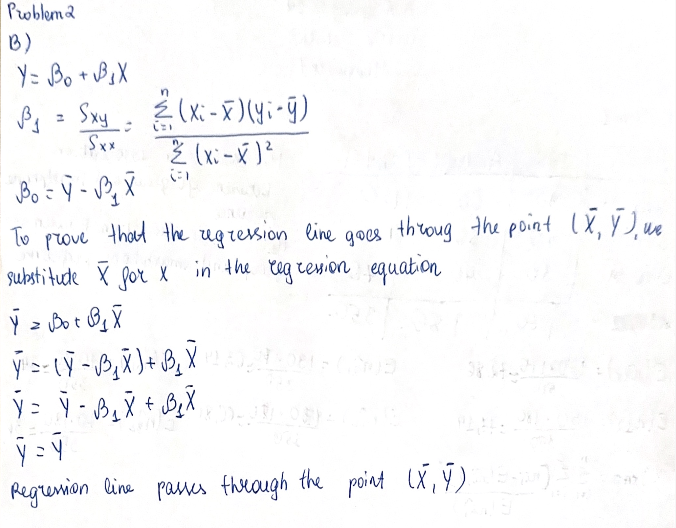

In [32]:
#Part c
predictions = model.predict(X)
residuals = Y - predictions
SSE_original = np.sum(residuals**2)
print("Original SSE:", SSE_original)


Original SSE: 504355687657.0143


In [33]:
#Part d
mean_X = np.mean(X)  
X_transformed = (X - mean_X) / 3 

model_transformed = LinearRegression()
model_transformed.fit(X_transformed, Y)

print("Transformed model coefficients (Intercept, Slope):", model_transformed.intercept_, model_transformed.coef_)


Transformed model coefficients (Intercept, Slope): 171900.0 [2375.18223677]


In [34]:
#Part e
predictions_transformed = model_transformed.predict(X_transformed)
residuals_transformed = Y - predictions_transformed
SSE_transformed = np.sum(residuals_transformed**2)
print("Transformed SSE:", SSE_transformed)

print("Comparison of SSEs:", "Original SSE =", SSE_original, ", Transformed SSE =", SSE_transformed)


Transformed SSE: 504355687657.01434
Comparison of SSEs: Original SSE = 504355687657.0143 , Transformed SSE = 504355687657.01434


When we perform a linear transformation of the independent variable 
𝑋(such as (x-x)/3, we are essentially changing the scale and possibly the location of 𝑋, but not the intrinsic linear relationship between 
𝑋 and Y.

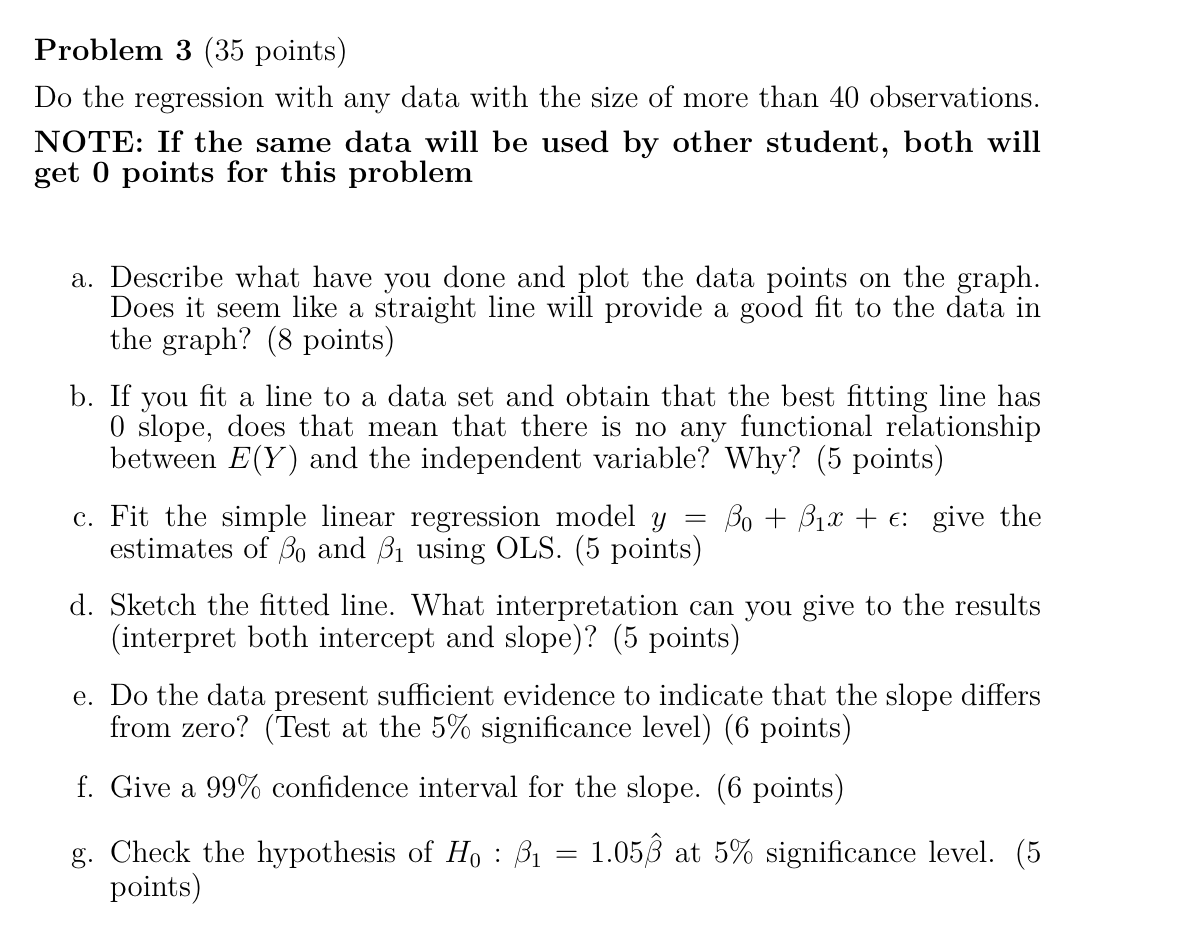

In [18]:
data1 = pd.read_csv('gpa_study_hours.csv', delimiter=',')
data2 = data1.iloc[:50].copy()
data2

,gpa,study_hours
0,4.000,10.0
1,3.800,25.0
2,3.930,45.0
3,3.400,10.0
4,3.200,4.0
5,3.520,10.0
6,3.680,24.0
7,3.400,40.0
8,3.700,10.0
9,3.750,10.0


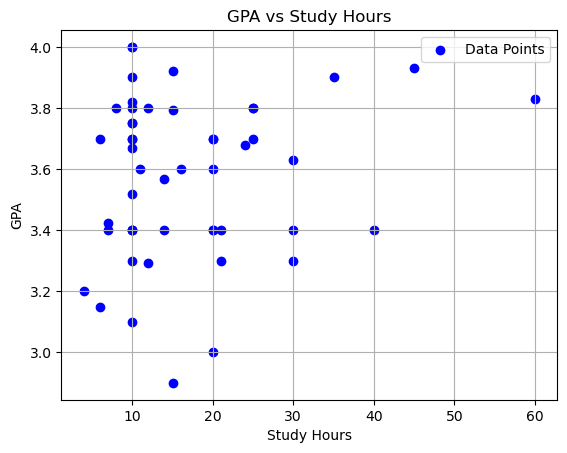

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from scipy import stats


# point a
plt.scatter(data2['study_hours'], data2['gpa'], color='blue', label='Data Points')
plt.title('GPA vs Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('GPA')
plt.grid(True)
plt.legend()
plt.show()

I have uploaded a data about GPA and Study hours of students.
As we can see the data points are spread across the plot, mostly clustered towards the middle range of study hours (10 to 30 hours).
There is some indication of a trend where higher study hours could correlate with a higher GPA. However, the correlation does not appear to be very strong.A straight line might not perfectly fit all the data points, as they do not all align closely with a single linear trend. 


#point b

A zero slope in a regression model implies that there is no linear relationship between the independent variable and the expected value of the dependent variable.However, this does not necessarily mean there is no relationship at all, as it can be non-linear, or other variables not included in the model might be influencing the dependent variable.

In [36]:
import statsmodels.api as sm

#point c

X = sm.add_constant(data2['study_hours'])

model = sm.OLS(data2['gpa'], X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.230
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.273
Time:                        23:08:11   Log-Likelihood:                -3.0685
No. Observations:                  50   AIC:                             10.14
Df Residuals:                      48   BIC:                             13.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.5080      0.069     50.776      

β0(const): This is the intercept of the linear regression model. It appears as "const" in the output. In my  model,β0 is approximately 3.5080. This value represents the predicted GPA when the study hours are zero.

β1(study_hours): This is the slope of the linear regression model. It appears as "study_hours" in the output. In my model, β1 is approximately 0.0038. This value represents the change in GPA for each additional hour of study. 

The small β1 suggests that the GPA changes very slightly with each additional study hour.


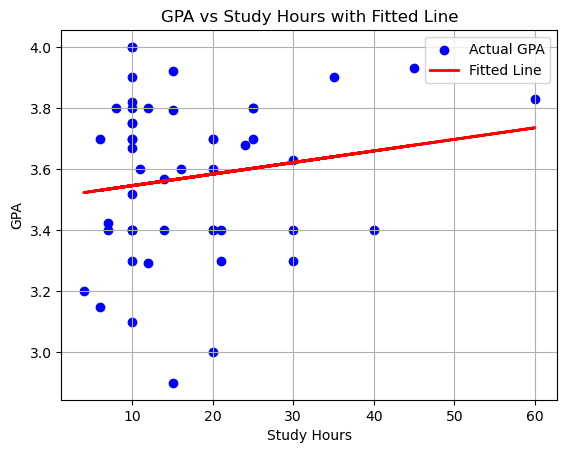

In [37]:
#point d
model = LinearRegression()
model.fit(data2[['study_hours']], data2['gpa'])

beta_0 = model.intercept_
beta_1 = model.coef_[0]

data2['predicted_gpa'] = model.predict(data2[['study_hours']])


plt.scatter(data2['study_hours'], data2['gpa'], color='blue', label='Actual GPA')
plt.plot(data2['study_hours'], data2['predicted_gpa'], color='red', label='Fitted Line', linewidth=2)

plt.title('GPA vs Study Hours with Fitted Line')
plt.xlabel('Study Hours')
plt.ylabel('GPA')
plt.legend()
plt.grid(True)
plt.show()


Intercept (β0)
The intercept in the plot shows to be approximately 3.5, as estimated in my regression model.This represents the expected GPA value when the study hours are zero. An intercept of 3.5 suggests that a student who does not spend any time studying is still expected to achieve a GPA of around 3.5. This relatively high  GPA could imply that factors other than study hours significantly contribute to GPA outcomes,such as inherent academic abilities, previous knowledge, or course difficulty might play a role.

Slope (β1)
Value: The slope from your regression output was very small, around 0.0038.The slope indicates the expected change in GPA for each additional hour spent studying. A slope of 0.0038 suggests that for each additional hour of study, the GPA is expected to increase by only 0.0038 points. This minimal increase shows a very weak positive relationship between study hours and GPA improvement. It suggests that increasing study hours has a very slight positive effect on GPA.

The line slopes upwards, indicating a positive relationship between study hours and GPA.

#point e
Slope (β1): The coefficient for study_hours is 0.0038.
Standard Error: The standard error for the slope is 0.003.
T-Statistic: The t-statistic for the slope is 1.109.
P-Value: The p-value associated with the t-statistic is 0.273.

Null Hypothesis (H0): The slope β1 is equal to zero(β1=0)
Alternative Hypothesis (H1): The slope β1 is not equal to zero (β1!=0)

Since the p-value is 0.273, which is greater than the significance level of 0.05, we fail to reject the null hypothesis. This means there is not enough statistical evidence at the 5% significance level to suggest that the slope (β1) differs from zero.

In [22]:
#point f
# i have 50 observations, which means df is 48
# two tailed,which means we should use 0.995
import scipy.stats as stats
df = 48
t_critical = stats.t.ppf(0.995, df)  
beta_1 = 0.0038
SE_beta_1 = 0.003

lower_bound = beta_1 - t_critical * SE_beta_1
upper_bound = beta_1 + t_critical * SE_beta_1

print(f"99% Confidence Interval for the slope: ({lower_bound}, {upper_bound})")


99% Confidence Interval for the slope: (-0.004246612080850641, 0.01184661208085064)


#point g

Null Hypothesis (H0): β1=1.05β1
Alternative Hypothesis (H1): β1!=1.05β1

t=(B1-1.05B1)/SE(B1)

In [38]:
import statsmodels.api as sm

X = sm.add_constant(data2['study_hours'])  
model = sm.OLS(data2['gpa'], X).fit() 

beta_hat = model.params['study_hours']
SE_beta_hat = model.bse[1]

beta_hypothesized = 1.05 * beta_hat
t_statistic = (beta_hat - beta_hypothesized) / SE_beta_hat

# Degrees of freedom,n - 2, I have 50 observations
df = 48

p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df)) 

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis at the 5% significance level.")
else:
    print("Do not reject the null hypothesis at the 5% significance level.")

T-statistic: -0.055445802632116646
P-value: 0.9560134556349393
Do not reject the null hypothesis at the 5% significance level.
